In [1]:
import numpy as np
import dedalus.public as d3
import logging
logger = logging.getLogger(__name__)
import copy
import h5py
import numpy as np
import matplotlib
import re

import matplotlib.pyplot as plt
from dedalus.extras import plot_tools

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import Normalize

import os
from os import listdir

In [2]:
# Parameters
Lx, Lz = 20,1
Nx, Nz = 1280, 64
Ra_M = 4.5e6
M_0 = 0
M_H = -1


Prandtl = 0.7
stop_sim_time = 2000

nu = (Ra_M / (Prandtl*(M_0-M_H)*Lz**3))**(-1/2)

In [3]:
folder_dir = "analysis"

file_paths = [os.path.join(folder_dir, file) for file in listdir(folder_dir) if os.path.isfile(os.path.join(folder_dir, file)) and file.endswith('.h5')]
#sort by the number in the file name
file_paths.sort(key=lambda f: int(re.sub('\D', '', f)))
print(file_paths)

['analysis/analysis_s1.h5', 'analysis/analysis_s2.h5', 'analysis/analysis_s3.h5', 'analysis/analysis_s4.h5', 'analysis/analysis_s5.h5', 'analysis/analysis_s6.h5', 'analysis/analysis_s7.h5', 'analysis/analysis_s8.h5', 'analysis/analysis_s9.h5', 'analysis/analysis_s10.h5', 'analysis/analysis_s11.h5', 'analysis/analysis_s12.h5', 'analysis/analysis_s13.h5', 'analysis/analysis_s14.h5', 'analysis/analysis_s15.h5', 'analysis/analysis_s16.h5', 'analysis/analysis_s17.h5', 'analysis/analysis_s18.h5']


In [4]:
"""
DEBUGGING CONTROL GROUP
"""
folder_dir = "snapshots"

file_paths = [os.path.join(folder_dir, file) for file in listdir(folder_dir) if os.path.isfile(os.path.join(folder_dir, file)) and file.endswith('.h5')]
#sort by the number in the file name
file_paths.sort(key=lambda f: int(re.sub('\D', '', f)))
all_tot_ke = []

for file in file_paths:
    with h5py.File(file, mode='r') as file:
        uuyy = file['tasks']['uy']
        uuxz = file['tasks']['u']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            uuuyyy = np.transpose(uuyy[t, :, :])
            uuxz_trans = np.transpose(uuxz[t, :, :])
            print(np.average(uuuyyy), np.sum(np.square(uuuyyy)))
            print(np.average(uuxz_trans), np.sum(np.square(uuxz_trans)),np.max(uuxz_trans), np.min(uuxz_trans))
            uxxuzz = np.ndarray.tolist(uuxz_trans)
            for lay_1 in range(len(uuxz_trans)):
                for lay_2 in range(len(uuxz_trans[lay_1])):
                    modulus = np.linalg.norm(uuxz_trans[lay_1][lay_2])
                    uxxuzz[lay_1][lay_2] = modulus
            to_plot = np.square(uuuyyy)+np.square(uxxuzz)
            all_tot_ke.append(np.sum(to_plot))
            if t == 8:
                break
        print(len(all_tot_ke))
        print(np.max(all_tot_ke))
#print(all_tot_ke[])

0.0 0.0
0.0 0.0 0.0 0.0
8.681100323205061e-15 8.466866125498525e-11
-4.309174244299481e-13 5.221637845198662e-06 4.612400997906728e-05 -5.0637016386916993e-05
2.890492502130041e-14 3.7835171805287195e-10
-7.645162627975157e-13 8.763152966007085e-06 6.01024699513006e-05 -6.37469339591055e-05
4.9245973119614535e-14 1.5656092684421461e-09
-7.860867492820485e-13 1.4324652667087561e-05 7.291049555933034e-05 -7.683819816509376e-05
5.5202420195619115e-14 4.179123759079461e-09
-5.77060301156263e-13 2.0406432835373995e-05 8.487154152119328e-05 -8.742062336749887e-05
5.2701805605169174e-14 7.396183266326216e-09
-3.6911159984046405e-13 2.5365082869516024e-05 9.811319573025747e-05 -9.157411271231954e-05
4.423438683661057e-14 1.2061885577952984e-08
-1.3459185590118984e-13 3.092735869174468e-05 0.0001126399840872793 -9.713998975926282e-05
2.935249503572651e-14 1.8538520462282376e-08
1.1528957396941794e-13 3.731310759148207e-05 0.00012888876609644522 -0.00010318922852372607
-6.923694093379683e-15 3.2

KeyboardInterrupt: 

In [4]:
"""
TOTAL KE
"""

all_tot_ke = []

for file in file_paths:
    with h5py.File(file, mode='r') as file:
        tot_ke = file['tasks']['total kinetic energy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            all_tot_ke.append(np.sum(tot_ke[t]))
print(all_tot_ke[:10])
print(max(all_tot_ke))
"""
mean KE
"""
all_mean_ke = []

for file in file_paths:
    with h5py.File(file, mode='r') as file:
        mean_ke = file['tasks']['mean kinetic energy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            all_mean_ke.append(np.average(mean_ke[t]))

[0.0, 2.9087813283438335e-10, 6.052428635477195e-10, 9.123654642549594e-10, 1.2178295810003777e-09, 1.83648090698588e-09, 2.1531860840718003e-09, 2.4770602407974964e-09, 2.8096086116030206e-09, 3.152372020098882e-09]
0.26128785070815946


17386
17386


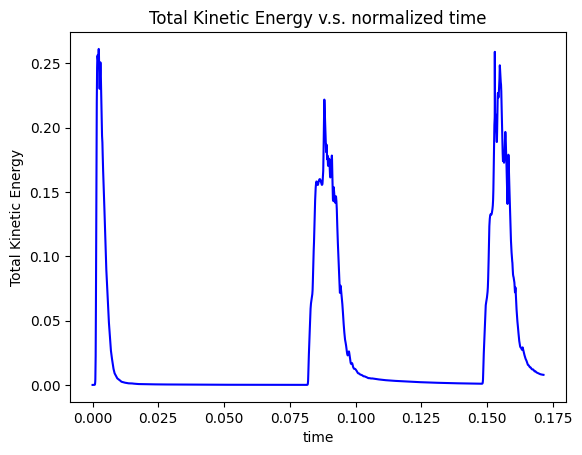

/state/partition1/job-40622197/ipykernel_1750115/4068205649.py:11: RuntimeWarning: divide by zero encountered in log
  plt.plot(figure_x_axis, np.log(all_tot_ke), color = 'blue')


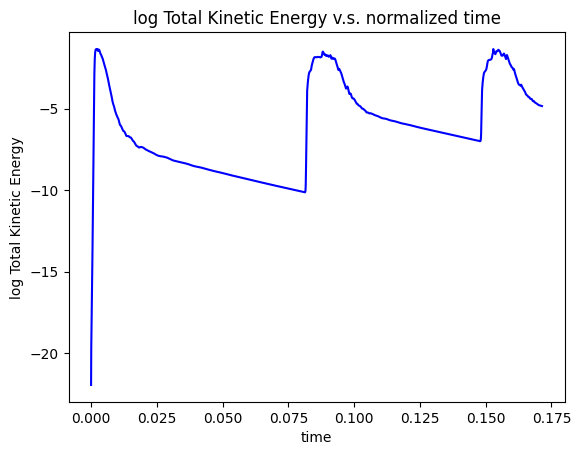

17386
17386


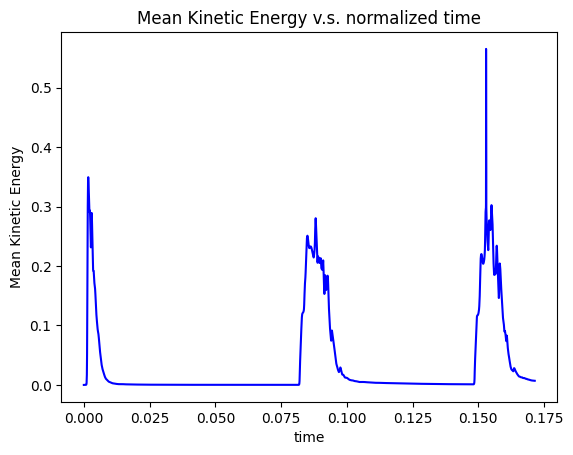

/state/partition1/job-40622197/ipykernel_1750115/4068205649.py:26: RuntimeWarning: divide by zero encountered in log
  plt.plot(figure_x_axis, np.log(all_mean_ke), color = 'blue')


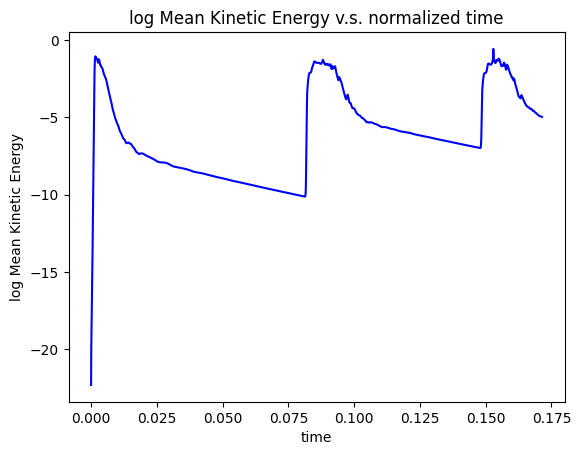

In [5]:
print(len(all_tot_ke))
figure_x_axis = np.array([(x/10*nu/(2**2)) for x in range(1, len(all_tot_ke)+1)])
print(len(figure_x_axis))
plt.plot(figure_x_axis, all_tot_ke, color = 'blue')
plt.xlabel('time')
plt.ylabel('Total Kinetic Energy')
plt.title('Total Kinetic Energy v.s. normalized time')
plt.show()
plt.clf()
figure_x_axis = np.array([(x/10*nu/(2**2)) for x in range(1, len(all_tot_ke)+1)])
plt.plot(figure_x_axis, np.log(all_tot_ke), color = 'blue')
plt.xlabel('time')
plt.ylabel('log Total Kinetic Energy')
plt.title('log Total Kinetic Energy v.s. normalized time')
plt.show()
plt.clf()
print(len(all_mean_ke))
figure_x_axis = np.array([(x/10*nu/(2**2)) for x in range(1, len(all_mean_ke)+1)])
print(len(figure_x_axis))
plt.plot(figure_x_axis, all_mean_ke, color = 'blue')
plt.xlabel('time')
plt.ylabel('Mean Kinetic Energy')
plt.title('Mean Kinetic Energy v.s. normalized time')
plt.show()
plt.clf()
plt.plot(figure_x_axis, np.log(all_mean_ke), color = 'blue')
plt.xlabel('time')
plt.ylabel('log Mean Kinetic Energy')
plt.title('log Mean Kinetic Energy v.s. normalized time')
plt.show()

In [6]:
all_tot_uy = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        uy = file['tasks']['tot uy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            uy_each = uy[t][0][0]
            all_tot_uy.append(uy_each)
print(all_tot_uy[3])
all_tot_ux = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        ux = file['tasks']['tot ux']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            ux_each = ux[t][0][0]
            all_tot_ux.append(ux_each)
print(all_tot_ux[3])
all_tot_uz = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        uz = file['tasks']['tot uz']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            uz_each = uz[t][0][0]
            all_tot_uz.append(uz_each)
print(all_tot_uz[3])

2.5539133443588057e-14
-2.5463136948580417e-12
1.0811153225948551e-16


17386
17386


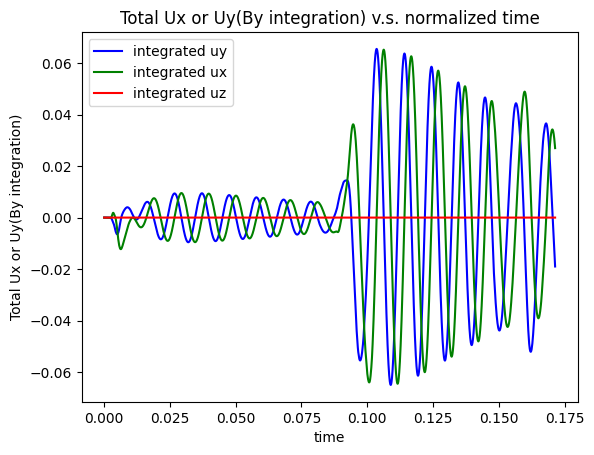

'\nI suspect that, because it is integrated, then total uz is always 0\n'

In [7]:
print(len(all_tot_uy))
figure_x_axis = np.array([(x/10*nu/(2**2)) for x in range(1, len(all_tot_uy)+1)])
print(len(figure_x_axis))
plt.plot(figure_x_axis, all_tot_uy, color = 'blue', label='integrated uy')
plt.plot(figure_x_axis, all_tot_ux, color = 'green', label='integrated ux')
plt.plot(figure_x_axis, all_tot_uz, color = 'red', label='integrated uz')
plt.xlabel('time')
plt.ylabel('Total Ux or Uy(By integration)')
plt.title('Total Ux or Uy(By integration) v.s. normalized time')
plt.legend()
plt.show()

"""
I suspect that, because it is integrated, then total uz is always 0
"""

In [8]:
all_tot_uy2 = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        uy2 = file['tasks']['ke by uy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            uy2_each = uy2[t][0][0]
            all_tot_uy2.append(uy2_each)
print(all_tot_uy2[3])
all_tot_ux2 = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        ux2 = file['tasks']['ke by ux']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            ux2_each = ux2[t][0][0]
            all_tot_ux2.append(ux2_each)
print(all_tot_ux2[3])
all_tot_uz2 = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        uz2 = file['tasks']['ke by uz']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            uz2_each = uz2[t][0][0]
            all_tot_uz2.append(uz2_each)
print(all_tot_uz2[3])

1.423596608650225e-14
2.2913335306716997e-10
6.83217875221703e-10


17386
17386


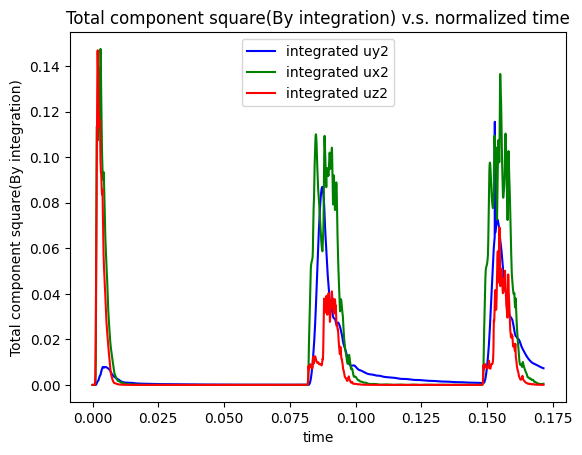

In [9]:
print(len(all_tot_uy2))
figure_x_axis = np.array([(x/10*nu/(2**2)) for x in range(1, len(all_tot_uy2)+1)])
print(len(figure_x_axis))
plt.plot(figure_x_axis, all_tot_uy2, color = 'blue', label='integrated uy2')
plt.plot(figure_x_axis, all_tot_ux2, color = 'green', label='integrated ux2')
plt.plot(figure_x_axis, all_tot_uz2, color = 'red', label='integrated uz2')
plt.xlabel('time')
plt.ylabel('Total component square(By integration)')
plt.title('Total component square(By integration) v.s. normalized time')
plt.legend()
plt.show()